In [1]:
%%html
<style>
.slide{
    min-height:600px;
    font-size:20px;
}
.quote{
    font-style: italic;
    font-family: comic sans;
    text-align: center;
    background-color: #ffffdd;
    border-top: 1px solid yellow;
    border-bottom: 1px solid yellow;
    font-size:28px;
}
.situation{
    background-color:#dddddd;
    border-top: 1px solid black;
    border-bottom: 1px solid black;
    font-size:20px;
}
.data{
    background-color:#ddffdd;
    border-top: 1px solid green;
    border-bottom: 1px solid green;
    font-size:20px;
}
.exercise{
    background-color:#ffdddd;
    border-top: 1px solid red;
    border-bottom: 1px solid red;
    font-size:20px;
}
</style>

<div class=slide>
<div style='float:left;margin-right:10px;max-width:50%'>
<h2>Data preparation</h2>
<ul>
 <li>based on data understanding
  <ul>
   <li>data collected, described, explored and verified</li>
  </ul>
 </li><br>
 <li>related to the chosen model
  <ul>
   <li>technique selected, based on business understanding</li>
   <li>trial and error</li>
  </ul>
 </li>
</ul>
</div>
<div style='float:right'>
<img src='img/CRISP-DM_Process_Diagram.png' width=320>
</div>
</div>

<div class=slide>
<br>
<div class=quote>By failing to prepare, you are preparing to fail</div><br><br>
<div style='color:red;font-size:100px;float:left;margin-right:100px'>
 <br><br><br><br><br>
 <b>80 %</b>
</div>
<div style='float:left'>
 <h3>Select</h3>
 <h3>Clean</h3>
 <h3>Construct</h3>
 <h3>Integrate</h3>
 <h3>Format</h3>
</div>
</div>

<div class=situation>
<h3>How to predict house prices in municipalities in Zeeland?</h3>
Selected technique: supervised regression model<br>
</div>

<div class=slide>
<h2>Select data</h2>

<h3>Relevance</h3>
<ul>
 <li>research question
</ul>
<div class=data>
<a href=https://www.nvm.nl/marktinformatie/marktinformatie>NVM Martkinformatie</a>: every quarter for Zeeuws Vlaanderen, Zeeuwse Eilanden, ...<br>
</div><br>
<div class=data>
<a href=https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html>Boston housing dataset</a>: Housing Values in Suburbs of Boston.<br>
</div>

<h3>Constraints</h3>
<ul>
 <li>volume
 <li>data type
 <li>selected technique
 <li>permission, legal, privacy
</ul>
<div class=data>
<a href=https://www.funda.nl/koop/goes/>Funda</a>: webpaga with currently available houses<br>
</div><br>
<div class=data>
<a href=https://www.huizenzoeker.nl/woningmarkt/>huizenzoeker.nl</a>: HuizenZoeker verzamelt gegevens van alle woningen die via grote huizensites en makelaarsites te koop worden aangeboden. Per woning worden de vraagprijs, woonoppervlakte en het woningtype opgeslagen.<br>
</div>

<h3>Quality</h3>
<ul>
 <li>reliability
 <li>validity
</ul>
<div class=data>
<a href=https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83625NED/table?ts=1544458016326>CBS Statline</a>: Existing houses; average prices, region<br>
</div>
</div>

In [2]:
import pandas as pd

df_prices = pd.read_csv('data/cbs_Bestaande_koopwoningen.csv',
    header=4,
    delimiter=';',
    skiprows=[5,35],
    index_col=0
    )[['1995','2017']]
df_prices.head()

,1995,2017
Perioden,,
Arnemuiden,65405.0,NaN
Axel,63721.0,NaN
Borsele,75997.0,207747.0
Brouwershaven,83319.0,NaN
Bruinisse,77794.0,NaN


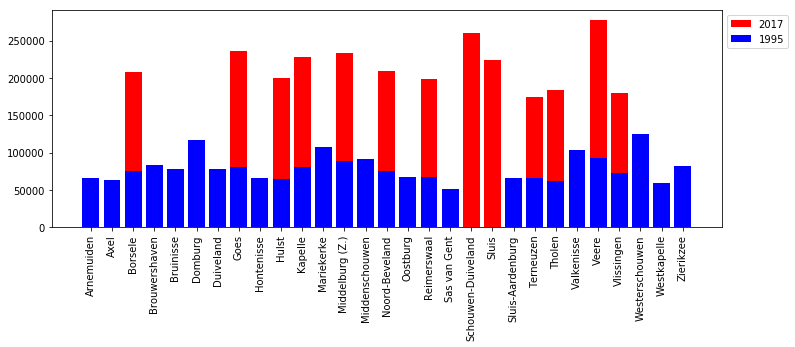

In [3]:
from matplotlib import pyplot as plt
% matplotlib inline

x = list(range(len(df_prices)))
plt.figure(figsize=(12,4))
plt.bar(x, df_prices['2017'], color='red', label=2017)
plt.bar(x, df_prices['1995'], color='blue', label=1995)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(x, df_prices.index, rotation=90)
plt.show()

<div class=data>
<a href=https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83958NED/table>CBS Woonplaatsen</a>
</div>

In [4]:
df_place_0 = pd.read_csv('data/cbs_Woonplaatsen_in_Nede_071218124320.csv',
                    header=3,
                    delimiter=';',
                    encoding='latin1'
                   )
df_place = df_place_0.loc[df_place_0['Naam.1']=='Zeeland', ['Naam', 'Woonplaatsen']]
df_place.head()

,Naam,Woonplaatsen
1,Veere,Aagtekerke
10,Sluis,Aardenburg
94,Middelburg,Arnemuiden
107,Terneuzen,Axel
114,Borsele,Baarland


In [5]:
population = set(df_place['Naam'].values)
print(population)

{'Sluis', 'Borsele', 'Noord-Beveland', 'Veere', 'Schouwen-Duiveland', 'Reimerswaal', 'Tholen', 'Terneuzen', 'Vlissingen', 'Kapelle', 'Hulst', 'Goes', 'Middelburg'}


<div class=data>
<a href=https://dataportaal.zeeland.nl/dataportaal/srv/dut/catalog.search#/search?topicCat=boundaries>dataportaal.zeeland.nl</a>: municipality borders (Kadaster)
</div>

In [6]:
df_geo = pd.read_csv('data/geogrz_gemgrznldvlk.csv', index_col='gm_naam')
print(len(df_geo), df_geo.columns.values)

419 ['FID' 'objectid' 'gm_code' 'aant_inw' 'aant_man' 'aant_vrouw'
 'p_00_14_jr' 'p_15_24_jr' 'p_25_44_jr' 'p_45_64_jr' 'p_65_eo_jr'
 'p_ongehuwd' 'p_gehuwd' 'p_gescheid' 'p_verweduw' 'bev_dichth'
 'aantal_hh' 'p_eenp_hh' 'p_hh_z_k' 'p_hh_m_k' 'gem_hh_gr' 'p_west_al'
 'p_n_w_al' 'p_marokko' 'p_ant_aru' 'p_surinam' 'p_turkije' 'p_over_nw'
 'opp_tot' 'opp_land' 'opp_water' 'se_anno_cad_data' 'shape']


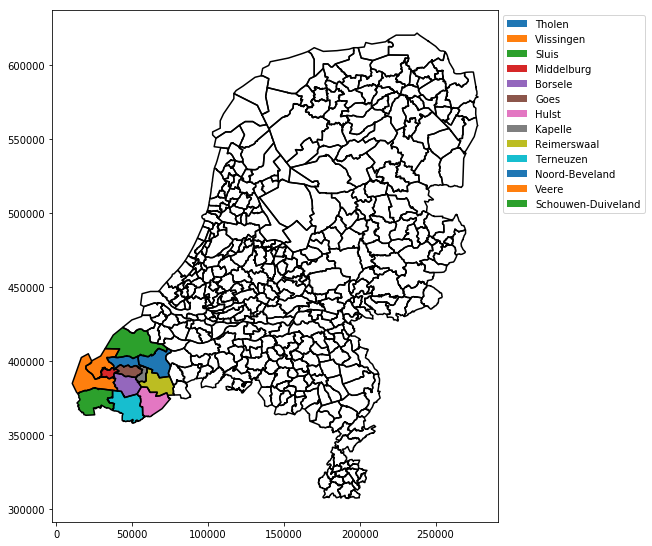

In [7]:
import code

fig, ax = plt.subplots(1, 1)
for name, shape in zip(df_geo.index, df_geo['shape'].values):
    for polygon in code.polygons_from_str(shape):
        plt.plot(*zip(*polygon), color='black')
        if name in population:
            plt.fill(*zip(*polygon), label=name)
code.apply_original_scale(fig, ax, 8)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [8]:
geo_features = ['opp_land', 'aant_inw', 'aantal_hh', 'aant_man', 'p_65_eo_jr', 'bev_dichth']
df_geo = df_geo.loc[population, geo_features]
df_geo.head()

,opp_land,aant_inw,aantal_hh,aant_man,p_65_eo_jr,bev_dichth
gm_naam,,,,,,
Sluis,27967,23980,11235,11770,23,86
Borsele,14172,22705,9245,11505,16,160
Noord-Beveland,8582,7475,3500,3740,22,87
Veere,13313,21925,9160,10955,20,165
Schouwen-Duiveland,23007,34205,15015,16895,21,149


<div class=data>
<a href=https://trends.google.nl/trends/explore?q=goes&geo=NL>Google Trends</a>: google searches per day
</div>

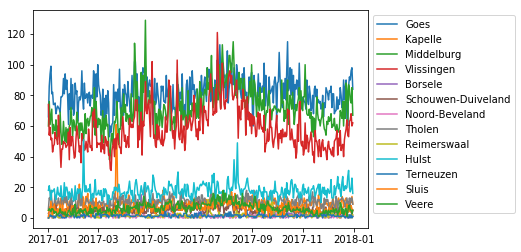

In [9]:
df_trends = pd.read_csv('data/trends.csv', index_col='Dag', parse_dates=['Dag'])
for col in df_trends:
    plt.plot(df_trends.index, df_trends[col], label=col)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

<div class=data>
knowledge-based features
</div>

In [10]:
train_connection = {'Reimerswaal', 'Kapelle', 'Goes', 'Middelburg', 'Vlissingen'}
north_sea = {'Schouwen-Duiveland', 'Veere', 'Vlissingen', 'Sluis'}
df_knowledge = pd.DataFrame(
    [['Yes' if m in train_connection else 'No',
      'North Sea' if m in north_sea else 'E/W Scheldt' if m != 'Middelburg' else 'No Sea']
     for m in sorted(population)],
    index=sorted(population),
    columns=['train_connection', 'sea']
)
df_knowledge

,train_connection,sea
Borsele,No,E/W Scheldt
Goes,Yes,E/W Scheldt
Hulst,No,E/W Scheldt
Kapelle,Yes,E/W Scheldt
Middelburg,Yes,No Sea
Noord-Beveland,No,E/W Scheldt
Reimerswaal,Yes,E/W Scheldt
Schouwen-Duiveland,No,North Sea
Sluis,No,North Sea
Terneuzen,No,E/W Scheldt


<div class=exercise>
For every municipality in the population, find the highest price of any house
</div>

<div class=slide>
<h2>Clean data</h2>

<h3>Filter records or columns</h3>
<ul>
 <li>bad quality
 <li>outliers
 <li>duplicates or redundancies
 <li>inconsistencies
 <li>representativity !
</ul>

<br>
<div class=exercise>
Look for outliers in the prices, and discuss whether or not to keep them
</div>

<h3>Standardization</h3>
<ul>
 <li>encoding, delimiters
 <li>strings, numbers, dates
 <li>synonyms, typos
 <li>missing values
</ul>

<h3>Missing data</h3>
<ul>
 <li>delete rows or columns
 <li>impute values: mean, mode, random draw, model
</ul>

</div>

<div class=situation>
How to handle the missing price information in 2017?
</div>

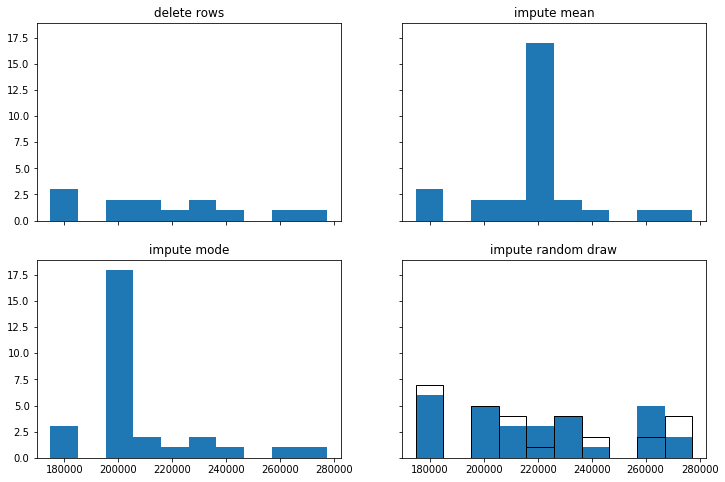

In [11]:
import random

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,8))

ax[0,0].hist(df_prices['2017'].dropna())
ax[0,0].set_title('delete rows')

ax[0,1].hist(df_prices['2017'].fillna(
    df_prices['2017'].mean()))
ax[0,1].set_title('impute mean')

ax[1,0].hist(df_prices['2017'].fillna(
    (1000*(0.001*df_prices['2017']).round().mode()).values[0]))
ax[1,0].set_title('impute mode')

ax[1,1].hist([v if not pd.isnull(v) else random.choice(list(df_prices['2017'].dropna()))
              for v in df_prices['2017']])
ax[1,1].hist([v if not pd.isnull(v) else random.choice(list(df_prices['2017'].dropna()))
              for v in df_prices['2017']], fill=None)
ax[1,1].set_title('impute random draw')

plt.show()

<div class=situation>
Can a model create imputations based on the price >20 years ago?
</div><br>
<div class=quote>
Three things: location, location and location
</div>

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


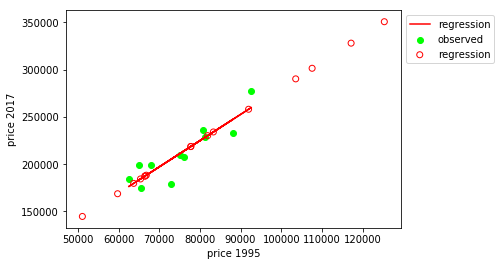

In [12]:
from sklearn.linear_model import LinearRegression

df_prices_observed = df_prices.dropna()
plt.scatter(df_prices_observed['1995'],
            df_prices_observed['2017'], color='lime', label='observed')

model = LinearRegression()
model.fit(df_prices_observed[['1995']], df_prices_observed['2017'])
plt.plot(df_prices_observed['1995'],
         model.predict(df_prices_observed[['1995']]), color='red', label='regression')

df_prices_unobserved = df_prices[df_prices['2017'].isnull()]
plt.scatter(df_prices_unobserved['1995'],
         model.predict(df_prices_unobserved[['1995']]),
            facecolors='none', edgecolors='red', label='regression')

plt.xlabel('price 1995')
plt.ylabel('price 2017')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

<div class=situation>
Why are prices for some municipalities missing in 2017?
</div>

In [13]:
municipality = set(df_prices.index) & set(df_place['Naam'])
place = set(df_prices.index) & set(df_place['Woonplaatsen'])
unknown = set(df_prices.index) - municipality - place
print(municipality, '\n')
print(place, '\n')
print(unknown, '\n')

{'Sluis', 'Borsele', 'Veere', 'Schouwen-Duiveland', 'Reimerswaal', 'Tholen', 'Noord-Beveland', 'Terneuzen', 'Vlissingen', 'Kapelle', 'Hulst', 'Goes'} 

{'Brouwershaven', 'Westkapelle', 'Sluis', 'Veere', 'Domburg', 'Oostburg', 'Arnemuiden', 'Zierikzee', 'Tholen', 'Sas van Gent', 'Terneuzen', 'Vlissingen', 'Kapelle', 'Axel', 'Hulst', 'Bruinisse', 'Goes'} 

{'Middenschouwen', 'Hontenisse', 'Sluis-Aardenburg', 'Westerschouwen', 'Middelburg (Z.)', 'Duiveland', 'Valkenisse', 'Mariekerke'} 



<h3>Standardization</h3>

In [14]:
replace = {'Middelburg (Z.)': 'Middelburg'}
df_prices.index = [replace.get(m, m) for m in df_prices.index]

<div class=slide>
<h2>Construct data</h2>

<h3>Feature engineering</h3>
<ul>
 <li>extract properties
 <li>combine features
 <li>group values
</ul>

<br>
<div class=exercise>
What properties can you extract from a date, to represent what it means?
</div>

<h3>Scaling and transforming</h3>
<ul>
 <li>scaling
 <li>transforming
</ul>

<h3>Data reduction</h3>
<ul>
 <li>sample
 <li>aggregate
 <li>PCA
</ul>

</div>

<h3>Extract properties</h3>

<div class=situation>
Extract some date properties for the Google searches.
</div>

In [15]:
df_trends['weekend'] = [int(d.weekday() >= 5) for d in df_trends.index.to_pydatetime()]
df_trends['summer'] = [int(6 <= d.month <= 8) for d in df_trends.index.to_pydatetime()]
df_trends[['weekend', 'summer']].iloc[150:160]

,weekend,summer
Dag,,
2017-05-31,0,0
2017-06-01,0,1
2017-06-02,0,1
2017-06-03,1,1
2017-06-04,1,1
2017-06-05,0,1
2017-06-06,0,1
2017-06-07,0,1
2017-06-08,0,1


<h3>Combine features</h3>

<div class=situation>
Present the geo information in a more sophisticated way
</div>

In [16]:
df_geo['hh_opp'] = df_geo['aantal_hh'] / df_geo['opp_land']
df_geo['pers_hh'] = df_geo['aant_inw'] / df_geo['aantal_hh']
df_geo['p_man'] = df_geo['aant_man'] / df_geo['aant_inw']
df_geo[['hh_opp', 'pers_hh', 'p_man']].head()

,hh_opp,pers_hh,p_man
gm_naam,,,
Sluis,0.401723,2.134401,0.490826
Borsele,0.652343,2.455922,0.506717
Noord-Beveland,0.407830,2.135714,0.500334
Veere,0.688049,2.393559,0.499658
Schouwen-Duiveland,0.652627,2.278055,0.493934


<div class=situation>
... and check it by comparing to an existing feature.
</div>

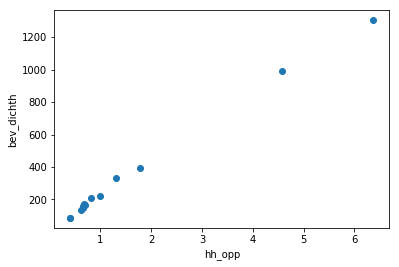

In [17]:
plt.scatter(df_geo['hh_opp'], df_geo['bev_dichth'])
plt.xlabel('hh_opp')
plt.ylabel('bev_dichth')
plt.show()

<h3>Group values</h3>

<div class=situation>
Municipalities can be grouped, based on their number of residents.
</div>

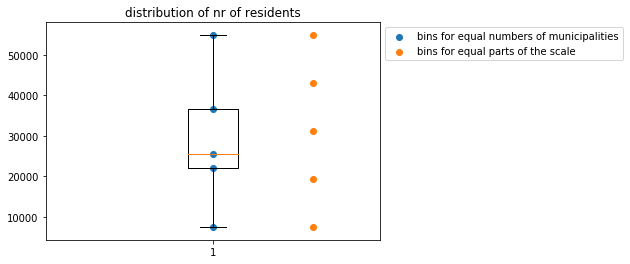

,aant_inw,pop_size_p,pop_size_e
gm_naam,,,
Noord-Beveland,7475,small,small
Kapelle,12365,small,small
Reimerswaal,21615,small,small medium
Veere,21925,small,small medium
Borsele,22705,small medium,small medium
Sluis,23980,small medium,small medium
Tholen,25490,small medium,small medium
Hulst,27720,large medium,small medium
Schouwen-Duiveland,34205,large medium,large medium


In [18]:
import numpy as np

plt.boxplot(df_geo['aant_inw'])
percentiles = np.percentile(df_geo['aant_inw'], [0,25,50,75,100])
plt.scatter(5*[1], percentiles, label='bins for equal numbers of municipalities')
df_geo['pop_size_p'] = pd.cut(df_geo['aant_inw'], bins=percentiles, include_lowest=True,
                            labels=['small', 'small medium', 'large medium', 'large'])

min_ = min(df_geo['aant_inw'])
max_ = max(df_geo['aant_inw'])
range_ = max_ - min_
equalparts = [min_] + [min_ + i*range_/4 for i in range(1,4)] + [max_]
plt.scatter(5*[1.3], equalparts, label='bins for equal parts of the scale')
df_geo['pop_size_e'] = pd.cut(df_geo['aant_inw'], bins=equalparts, include_lowest=True,
                            labels=['small', 'small medium', 'large medium', 'large'])

plt.title('distribution of nr of residents')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

df_geo[['aant_inw', 'pop_size_p', 'pop_size_e']].sort_values(by='aant_inw')

<h3>Scaling</h3>

<div class=situation>
Scaling makes comparison easier, but original values are lost.
</div>

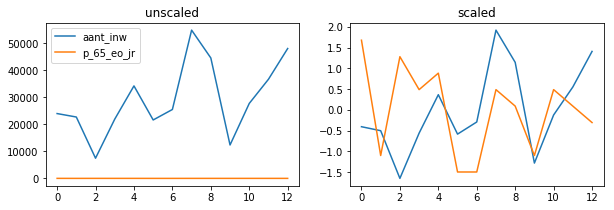

In [19]:
from sklearn.preprocessing import StandardScaler

x = list(range(len(df_geo)))
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].set_title('unscaled')
ax[0].plot(x, df_geo['aant_inw'], label='aant_inw')
ax[0].plot(x, df_geo['p_65_eo_jr'], label='p_65_eo_jr')
ax[0].legend()

scal=StandardScaler()
ax[1].set_title('scaled')
ax[1].plot(x, scal.fit_transform(df_geo[['aant_inw']].astype(np.float64)))
ax[1].plot(x, scal.fit_transform(df_geo[['p_65_eo_jr']].astype(np.float64)))

plt.show()

<div class=situation>
The log transform can improve distribution and linearity for count data.
</div>

<h3>Transforming</h3>

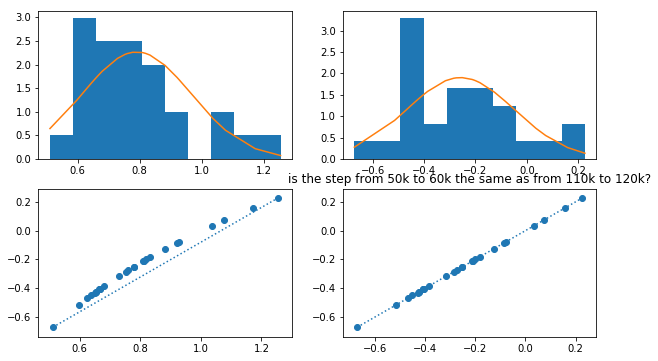

In [20]:
from scipy import stats

fig, ax = plt.subplots(2, 2, figsize=(10,6))
prices = sorted(df_prices['1995'].dropna()/1e5)
log_prices = np.log(prices)
ax[0,0].hist(prices, density=True)
ax[0,0].plot(prices, stats.norm.pdf(prices, np.mean(prices), np.std(prices)))
ax[0,1].hist(log_prices, density=True)
ax[0,1].plot(log_prices, stats.norm.pdf(log_prices, np.mean(log_prices), np.std(log_prices)))
ax[1,0].plot([prices[0], prices[-1]], [log_prices[0], log_prices[-1]], linestyle=':')
ax[1,0].scatter(prices, log_prices)
ax[1,1].plot([log_prices[0], log_prices[-1]], [log_prices[0], log_prices[-1]], linestyle=':')
ax[1,1].scatter(log_prices, log_prices)
plt.title('is the step from 50k to 60k the same as from 110k to 120k?')
plt.show()

<h3>Sample</h3>

<div class=situation>
Samples can be drawn once (faster) or averaged (more representative).
</div>

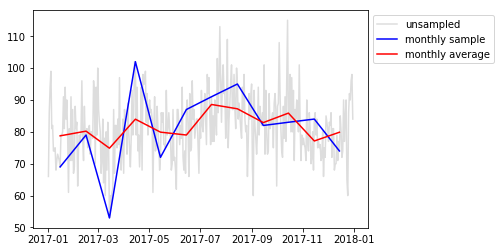

In [21]:
plt.plot(df_trends.index, df_trends['Goes'], color='#dddddd', label='unsampled')
df_trends_monthly = df_trends[df_trends.index.day==15]
plt.plot(df_trends_monthly.index, df_trends_monthly['Goes'],
         color='blue', label='monthly sample')
plt.plot(df_trends_monthly.index, df_trends['Goes'].groupby(df_trends.index.month).mean(),
         color='red', label='monthly average')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

<h3>Aggregate</h3>

<div class=situation>
What daily Google searches tell about municipalities.
</div>

In [22]:
trends_agg = [[m,
               df_trends[m].mean(),
               df_trends[df_trends['weekend']==1][m].mean(),
               df_trends[df_trends['summer']==1][m].mean()]
              for m in population]
df_trends_agg = pd.DataFrame([[m, avg, weekend/avg, summer/avg]
                              for m, avg, weekend, summer in trends_agg],
                             columns=['Gemeente', 'GT_avg', 'GT_weekend', 'GT_summer'])
df_trends_agg.set_index('Gemeente', inplace=True)
df_trends_agg

,GT_avg,GT_weekend,GT_summer
Gemeente,,,
Sluis,5.997260,1.119559,1.343005
Borsele,1.536986,0.855106,0.940576
Noord-Beveland,0.994521,0.813984,0.929003
Veere,6.438356,1.042857,1.468779
Schouwen-Duiveland,5.227397,0.974718,1.237211
Reimerswaal,1.515068,0.685180,1.176586
Tholen,10.939726,0.910617,1.084003
Terneuzen,1.457534,0.908253,1.073880
Vlissingen,58.158904,1.068337,1.226961


<h3>PCA</h3>

<div class=situation>
Principal Component Analysis (PCA): prevents overfit, costs interpretability.
</div>

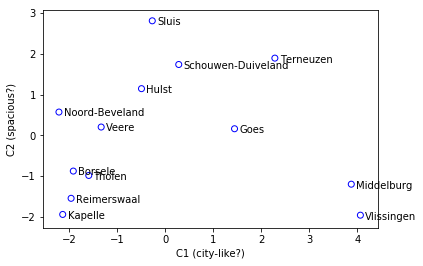

,opp_land,aant_inw,aantal_hh,aant_man,p_65_eo_jr,bev_dichth,hh_opp,pers_hh,p_man
C1,,0.42,0.44,0.42,,0.37,0.37,-0.32,
C2,0.59,,,,0.53,-0.36,-0.34,,


In [23]:
from sklearn.decomposition import PCA

str_vars = ['pop_size_p', 'pop_size_e']
num_vars = [v for v in df_geo if v not in str_vars]

pca = PCA(n_components=2)
scal = StandardScaler()

components = pca.fit_transform(
    scal.fit_transform(
        df_geo[num_vars].astype(np.float64)))

for municipality, (c1, c2) in zip(df_geo.index, components):
    plt.scatter([c1], [c2], facecolors='none', edgecolors='blue')
    plt.text(c1+0.1, c2-0.1, municipality)
plt.xlabel('C1 (city-like?)')
plt.ylabel('C2 (spacious?)')
plt.show()

pd.DataFrame(np.where(abs(pca.components_)>0.3, np.round(pca.components_,2), ''),
             columns=num_vars, index=['C1', 'C2'])

<div class=slide>
<h2>Integrate data</h2>

<br><br>
<div class=quote>
An SQL query walks into a bar and sees two tables.<br><br>
He walks up to them and says 'Can I join you?'
</div>

<h3>Identify entities</h3>
<ul>
 <li>find suitable entities
  <ul>
   <li>well defined</li>
   <li>independent</li>
   <li>reconsider data selection</li>
  </ul>
 <li>verify key matches for joining
</ul>

<h3>Aggregate and merge</h3>
<ul>
 <li>all data at same measurement level
 <li>all data in one table
</ul>

</div>

<h3>Aggregate</h3>

<div class=situation>
Places are within municipalities, their information can be aggregated
</div>

In [24]:
df_place_count = df_place.groupby('Naam').count()
df_place_count.head()

,Woonplaatsen
Naam,
Borsele,15
Goes,7
Hulst,15
Kapelle,4
Middelburg,3


<h3>Merge</h3>

In [25]:
df = df_geo.join(
    df_place_count.join(
        df_knowledge.join(
            df_trends_agg.join(
                df_prices['2017']))))
df

,opp_land,aant_inw,aantal_hh,aant_man,p_65_eo_jr,bev_dichth,hh_opp,pers_hh,p_man,pop_size_p,pop_size_e,Woonplaatsen,train_connection,sea,GT_avg,GT_weekend,GT_summer,2017
gm_naam,,,,,,,,,,,,,,,,,,
Sluis,27967,23980,11235,11770,23,86,0.401723,2.134401,0.490826,small medium,small medium,16,No,North Sea,5.997260,1.119559,1.343005,223694.0
Borsele,14172,22705,9245,11505,16,160,0.652343,2.455922,0.506717,small medium,small medium,15,No,E/W Scheldt,1.536986,0.855106,0.940576,207747.0
Noord-Beveland,8582,7475,3500,3740,22,87,0.407830,2.135714,0.500334,small,small,6,No,E/W Scheldt,0.994521,0.813984,0.929003,209737.0
Veere,13313,21925,9160,10955,20,165,0.688049,2.393559,0.499658,small,small medium,13,No,North Sea,6.438356,1.042857,1.468779,277322.0
Schouwen-Duiveland,23007,34205,15015,16895,21,149,0.652627,2.278055,0.493934,large medium,large medium,17,No,North Sea,5.227397,0.974718,1.237211,260533.0
Reimerswaal,10199,21615,8315,10825,15,212,0.815276,2.599519,0.500810,small,small medium,7,Yes,E/W Scheldt,1.515068,0.685180,1.176586,199257.0
Tholen,14709,25490,10085,12785,15,173,0.685635,2.527516,0.501569,small medium,small medium,8,No,E/W Scheldt,10.939726,0.910617,1.084003,183833.0
Terneuzen,25065,54825,24820,27295,20,219,0.990225,2.208904,0.497857,large,large,13,No,E/W Scheldt,1.457534,0.908253,1.073880,174793.0
Vlissingen,3418,44535,21790,22190,19,1303,6.375073,2.043827,0.498260,large,large,3,Yes,North Sea,58.158904,1.068337,1.226961,179186.0


<div class=slide>
<h2>Format data</h2>

<h3>Representation</h3>
<ul>
 <li>meet requirements of the modeling tool
 <li>numerical
  <ul>
   <li>encode categorical variables as 0/1 dummies</li>
   <li>extract properties from dates, text, images, etc.</li>
  </ul>
  <li>sparsity
  <li>special formats
</ul>

<h3>Structure</h3>
<ul>
 <li>features
  <ul>
   <li>n rows, m columns</li>
  </ul>
  <li>target
  <ul>
   <li>n rows, 1 column</li>
  </ul>
</ul>

</div>

<h3>Encode dummies</h3>

In [26]:
df[['pop_size_e']].join(pd.get_dummies(df['pop_size_e']))

,pop_size_e,small,small medium,large medium,large
gm_naam,,,,,
Sluis,small medium,0,1,0,0
Borsele,small medium,0,1,0,0
Noord-Beveland,small,1,0,0,0
Veere,small medium,0,1,0,0
Schouwen-Duiveland,large medium,0,0,1,0
Reimerswaal,small medium,0,1,0,0
Tholen,small medium,0,1,0,0
Terneuzen,large,0,0,0,1
Vlissingen,large,0,0,0,1


<h3>Sparsity</h3>

In [27]:
pd.concat([pd.get_dummies(df['pop_size_e']).memory_usage(index=False),
           pd.get_dummies(df['pop_size_e'], sparse=True).memory_usage(index=False)],
         axis=1).rename(columns={0:'dense memory', 1:'sparse memory'})

,dense memory,sparse memory
small,13,2
small medium,13,6
large medium,13,2
large,13,3


<h3>Structure</h3>

In [28]:
df_features = pd.get_dummies(df.drop('2017', axis=1))
print(df_features.columns.values)

['opp_land' 'aant_inw' 'aantal_hh' 'aant_man' 'p_65_eo_jr' 'bev_dichth'
 'hh_opp' 'pers_hh' 'p_man' 'Woonplaatsen' 'GT_avg' 'GT_weekend'
 'GT_summer' 'pop_size_p_small' 'pop_size_p_small medium'
 'pop_size_p_large medium' 'pop_size_p_large' 'pop_size_e_small'
 'pop_size_e_small medium' 'pop_size_e_large medium' 'pop_size_e_large'
 'train_connection_No' 'train_connection_Yes' 'sea_E/W Scheldt'
 'sea_No Sea' 'sea_North Sea']


In [29]:
df_target = df['2017']
df_target

gm_naam
Sluis                 223694.0
Borsele               207747.0
Noord-Beveland        209737.0
Veere                 277322.0
Schouwen-Duiveland    260533.0
Reimerswaal           199257.0
Tholen                183833.0
Terneuzen             174793.0
Vlissingen            179186.0
Kapelle               228219.0
Hulst                 199354.0
Goes                  236388.0
Middelburg            232814.0
Name: 2017, dtype: float64